In [1]:
library(KFAS)

In [2]:
tsuki <- ts(scan("leadingDAT_src/tsuki.txt"))

In [3]:
head(tsuki)

[1] 704 621 783 679 765 676

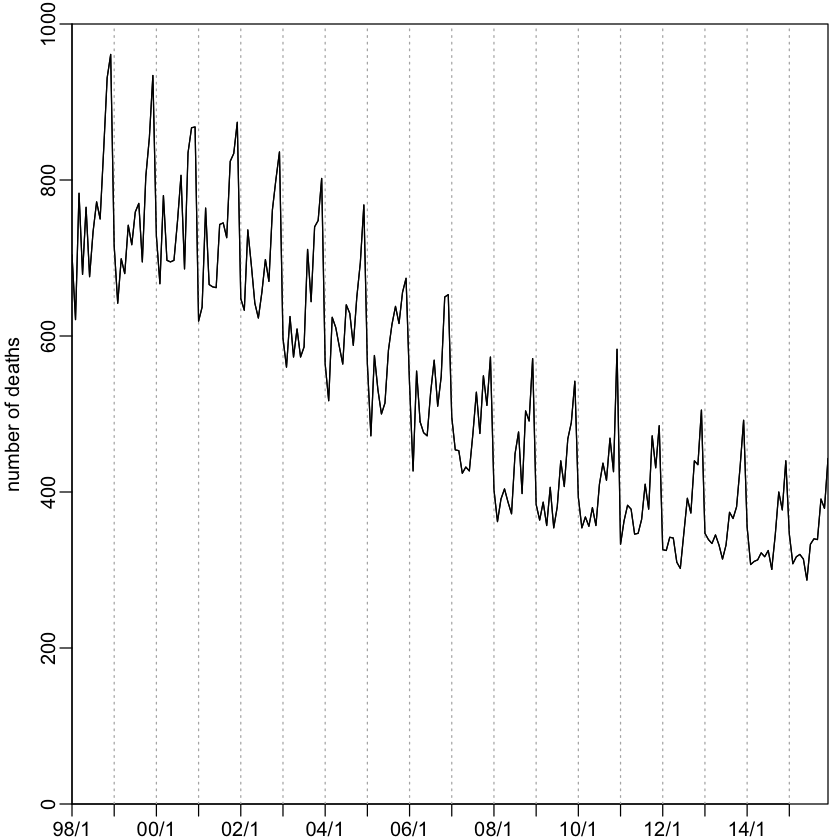

In [5]:
par(mar=c(1.5,3,1,0.5))
par(mgp=c(2,0.5,0))
plot(tsuki,xlim=c(1,216),ylim=c(0,1000),ylab="number of deaths",xlab="",xaxt="n",xaxs="i",yaxs="i")
axis(side=1,at=1+0:17*12,labels=c("98/1","99/1","00/1","01/1","02/1","03/1","04/1","05/1","06/1","07/1","08/1","09/1","10/1","11/1","12/1","13/1","14/1","15/1"))
abline(v=1+1:17*12,lty=3,col=gray(0.7))
lines(tsuki)

* Observation values are positive integer and no upper limit  
→ poisson distribution
* Fluctuation bandwidth changes according to number of peaple  
→ log link
* Seasonal trend
* Smooth trend without seasonal component

In [6]:
modPois <- SSModel(tsuki ~ SSMtrend(2,Q=list(0,NA))
                  + SSMseasonal(12,Q=NA),distribution="poisson")
# Note: 色々な初期値を試して大域的最適解を探索する
# Note: 非ガウスモデルの場合、シミュレーション数を指定する(nsim=0でも近似解を計算可能)
fitPois <- fitSSM(modPois,c(-15,-10),nsim=1000,method="BFGS")
kfsPois <- KFS(fitPois$model,nsim=1000)
# prePois <- predict(fitPois)

In [7]:
prePois <- predict(fitPois$model, interval="prediction",
level=0.95, nsim=10000)

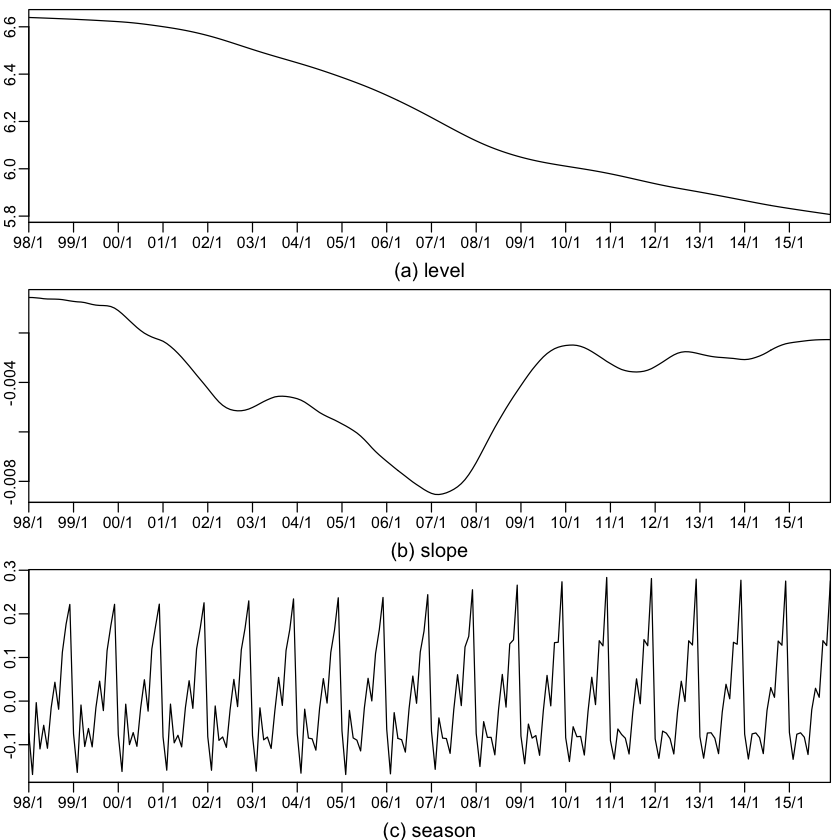

In [8]:
par(mfrow=c(3,1))
par(cex=0.8)
par(mar=c(3,1.5,0.5,0.5))
par(mgp=c(2,0.5,0))
plot(kfsPois$al[,1], type="l", xlab="",ylab="", xaxt="n",xaxs="i")
axis(side=1,at=1+0:17*12,labels=c("98/1","99/1","00/1","01/1","02/1","03/1","04/1","05/1","06/1","07/1","08/1","09/1","10/1","11/1","12/1","13/1","14/1","15/1"))
mtext("(a) level",side=1,cex=1,line=2)
plot(kfsPois$al[,2], type="l", xlab="",ylab="", xaxt="n",xaxs="i")
axis(side=1,at=1+0:17*12,labels=c("98/1","99/1","00/1","01/1","02/1","03/1","04/1","05/1","06/1","07/1","08/1","09/1","10/1","11/1","12/1","13/1","14/1","15/1"))
mtext("(b) slope",side=1,cex=1,line=2)
plot(kfsPois$al[,3], type="l", xlab="",ylab="", xaxt="n",xaxs="i")
axis(side=1,at=1+0:17*12,labels=c("98/1","99/1","00/1","01/1","02/1","03/1","04/1","05/1","06/1","07/1","08/1","09/1","10/1","11/1","12/1","13/1","14/1","15/1"))
mtext("(c) season",side=1,cex=1,line=2)